Creating the kinetic data curve fitting script

# Set up and module imports

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import pandas as pd


#Import Data + Clean Data
def importCleanData(file_name, sheet, columns):
    data = pd.read_excel(file_name, sheet_name = sheet)
    cleanData = data.loc[:, columns].dropna()
    return cleanData

# Change the working directory 
print(os.getcwd()) # Prints the current working directory
# directories 
justin = 'C:/Users/dhlpablo_m2/Desktop/Git/Data_extraction_kinetic_signaling_data/data/train_data/vegf_testdata'
Lionel = 'C:/Users/Imoukhuede lab/OneDrive - UW/Desktop/GitHub/Data_extraction_kinetic_signaling_data/data/train_data/vegf_testdata'
# Provide the new path here
os.chdir(justin) 
# Prints the new working directory
print(os.getcwd())




C:\Users\dhlpablo_m2\Desktop\Git\Data_extraction_kinetic_signaling_data\data\train_data\vegf_testdata
C:\Users\dhlpablo_m2\Desktop\Git\Data_extraction_kinetic_signaling_data\data\train_data\vegf_testdata


## Importing the data from the csv file

In [37]:
# Import Data
testFile1 = pd.read_excel("VEGFA165_NRP1_0.5-8nM_Lu2023.xlsx", sheet_name = "sheet1")
testFile105 = importCleanData("VEGFA165_NRP1_0.5-8nM_Lu2023.xlsx", "sheet1", ["Time 0.5nM", "RU 0.5nM"])
testFile11 = importCleanData("VEGFA165_NRP1_0.5-8nM_Lu2023.xlsx", "sheet1", ["Time 1nM", "RU 1nM"])

# Function Building

## Defining the functions

In [38]:
# Fitting equation to Find the kon value

def baseline_steadystate_response(t, y_initial, y_final, kon):
    """
    Function to find the kon value from the data. 
    Assuming we know the baseline and the steady state response, we can find the kon value.
    The equation is y(t) = y_final * (1 - exp(-kon * t)) + y_intial

    Parameters
    ----------
    data : pandas dataframe
        Dataframe containing the time and response values
    y_intial : float
        The baseline value of the response
    y_final : float
        The steady state value of the response
    t : float
        The time value

    Returns
    -------
    function
        The function that can be used to calculate the response
    """
    return y_final * (1 - np.exp(-kon * t)) + y_initial

In [39]:
def response_to_zero(t, C, y_initial,  kon, koff):
    """
    Function to find the kon and koff values from the data
    Assuming we know that the response goes to zero

    Parameters
    ----------
    data : pandas dataframe
        Dataframe containing the time and response values
    C : float
        The initial rate of signaling
    y_initial : float
        The baseline value of the response
    t : float
        The time value
    
    Returns
    -------
    function
        The function that can be used to calculate the response

    """
    return (C / (kon - koff)) * (np.exp(-koff * t) - np.exp(-kon * t)) + y_initial


In [40]:

def response_to_steady_state(t, y_initial, y_final,  D, kon, koff):
    """
    Function to find the kon and koff values from the data
    Assuming we know the steady state response

    Parameters
    ----------
    data : pandas dataframe
        Dataframe containing thetime and response values
    y_initial : float
        The initial rate of signaling
    y_final : float
        The final rate of signaling
    t : float
        The time value
    
    Returns
    -------
    function
        The function that can be used to calculate the response

    """
    return y_final * ((1 - D * np.exp(-kon * t)) + (D - 1) * np.exp(-koff * t)) + y_initial

In [41]:
# Typical association
def typical_association(t, y_final, conc, kon, koff):
    """
    Function to find the kon and koff values from the data
    Assuming it is a typical association function

    Parameters
    ----------
    data : pandas dataframe
        Dataframe containing thetime and response values
    y_final : float
        The final rate of signaling
    t : float
        The time value
    conc : float
        The concentration of the substance
    
    Returns
    -------
    function
        The function that can be used to calculate the response

    """
    kd = koff/kon
    return ( (y_final * conc) / (koff/kon + conc) ) * (1 - np.exp( (-1*(kon * conc + koff)) * t) )

In [42]:
# Typical dissociation
def typical_dissociation(t, y_initial, koff):
    """
    Function to find the koff values from the data
    Assuming it is a typical dissociation function

    Parameters
    ----------
    data : pandas dataframe
        Dataframe containing thetime and response values
    y_initial : float
        The initial rate of signaling
    t : float
        The time value
    
    Returns
    -------
    function
        The function that can be used to calculate the response

    """
    return y_initial * np.exp(-koff * t)

## Whole function test

In [43]:
# Fitting the data to the equation
def fit_data(data, time, resposne, assumption = "response to steady state", y_final = None, y_initial = None, C = None, D = None, kon=None, koff=None):
    """
    Function to fit the data to the function

    Parameters
    ----------
    data : pandas dataframe
        Dataframe containing the time and response values
    function : function
        The function that will be used to fit the data

    Returns
    -------
    param_k
        The parameters of the function
    pcov_k  
        The covariance of the parameters
    """

    if assumption == "baseline+steadystate":
        def baseline_steadystate_response(y_initial, y_final, t, kon):
            """
            Function to find the kon value from the data. 
            Assuming we know the baseline and the steady state response, we can find the kon value.
            The equation is y(t) = y_final * (1 - exp(-kon * t)) + y_intial

            Parameters
            ----------
            data : pandas dataframe
                Dataframe containing the time and response values
            y_intial : float
                The baseline value of the response
            y_final : float
                The steady state value of the response
            t : float
                The time value

            Returns
            -------
            function
                The function that can be used to calculate the response
            """
            return y_final * (1 - np.exp(-kon * t)) + y_initial
        function = baseline_steadystate_response

    elif assumption == "response to zero":
        def response_to_zero(C, y_initial, t, kon, koff):
            """
            Function to find the kon and koff values from the data
            Assuming we know that the response goes to zero

            Parameters
            ----------
            data : pandas dataframe
                Dataframe containing the time and response values
            C : float
                The initial rate of signaling
            y_initial : float
                The baseline value of the response
            t : float
                The time value
            
            Returns
            -------
            function
                The function that can be used to calculate the response

            """
            return (C / (kon - koff)) * (np.exp(-koff * t) - np.exp(-kon * t)) +y_initial
        
        function = response_to_zero

    elif assumption == "response to steady state":
        def response_to_steady_state(y_initial, y_final, t, D, kon, koff):
            """
            Function to find the kon and koff values from the data
            Assuming we know the steady state response

            Parameters
            ----------
            data : pandas dataframe
                Dataframe containing thetime and response values
            y_initial : float
                The initial rate of signaling
            y_final : float
                The final rate of signaling
            t : float
                The time value
            
            Returns
            -------
            function
                The function that can be used to calculate the response

            """
            return y_final * ((1 - D * np.exp(-kon * t)) + (D - 1) * np.exp(-koff * t)) + y_initial
        
        function = response_to_steady_state

    param_k, pcov_k = curve_fit(function, time, resposne)

    return param_k, pcov_k

# Test the fitting functions

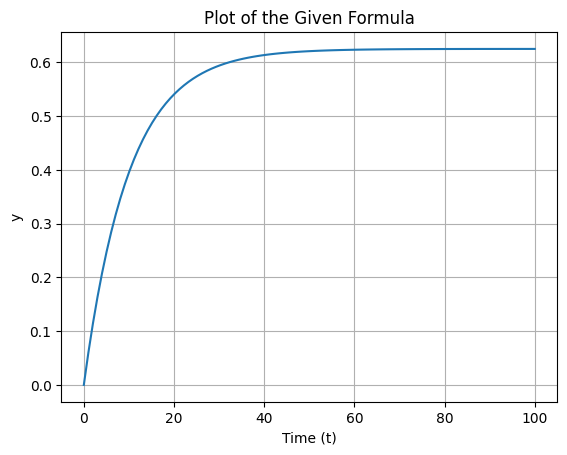

In [44]:
#Example association

# Define the parameters
y_final = 1.0
C = 0.5
k_d = 0.3
k_on = 0.1
k_off = 0.05
t = np.linspace(0, 100, 100)


# Calculate the expression
y = (y_final * C / (k_d + C)) * (1 - 1 / np.exp((k_on * C + k_off) * t))

# Plot the results
plt.plot(t, y)
plt.xlabel('Time (t)')
plt.ylabel('y')
plt.title('Plot of the Given Formula')
plt.grid(True)
plt.show()

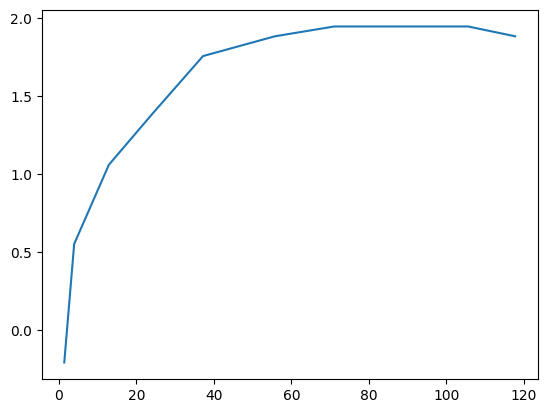

Initial guess:  [np.float64(1.885), 1e-08, 55473110.0, 0.008049]


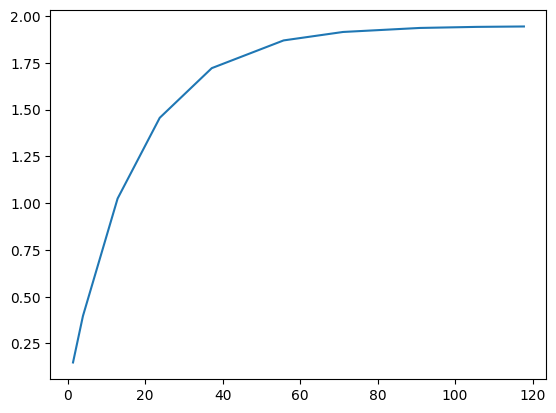

Fitted parameters:  [2.37011594e+00 2.93109300e-09 1.62671070e+07 1.03747235e-02]


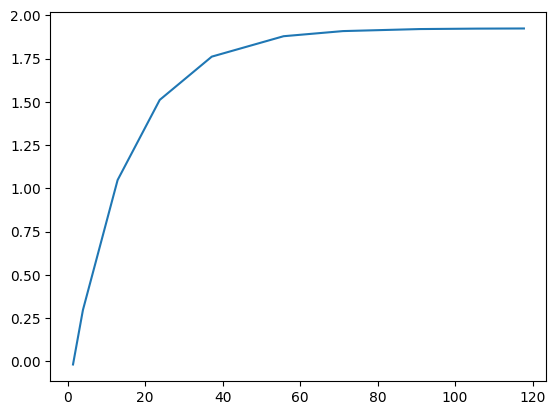

Fitted parameters:  [-0.21020516  2.13433909  0.06912463]


In [56]:
# Testing first half of the data with association equation

testFile105 = importCleanData("VEGFA165_NRP1_0.5-8nM_Lu2023.xlsx", "sheet1", ["Time 0.5nM", "RU 0.5nM"])
# remove the first 4 rows
testFile105 = testFile105.iloc[4:]
testFile105 = testFile105.iloc[:-15]
testFile105
# plot the data
plt.plot(testFile105["Time 0.5nM"], testFile105["RU 0.5nM"])
plt.show ()

# Initial guess for the parameters
y_initial = testFile105.iloc[0, 1]
y_final = testFile105["RU 0.5nM"].iloc[-1]  # Extract the single value
#initial_guess = [y_initial, y_final, 6e1, 0.5, 1]
initial_guess = [y_final, 10*(10**(-9)) , 5.547311e+07, 0.008049]
print("Initial guess: ", initial_guess)

# data
t_data = testFile105["Time 0.5nM"]
response_data = testFile105["RU 0.5nM"]

param_k, pcov_k = curve_fit(typical_association, t_data, response_data, p0=initial_guess)


fitted_response= typical_association(testFile105["Time 0.5nM"], *param_k)
plt.plot(testFile105["Time 0.5nM"], fitted_response, label='Fitted Data')
plt.show ()
print("Fitted parameters: ", param_k)
# plot the fitted data 
# created fitted response data


# plot with baseline equation

# Initial guess for the parameters
y_initial = testFile105.iloc[0, 1]
y_final = testFile105["RU 0.5nM"].iloc[-1]  # Extract the single value
initial_guess = [y_initial, y_final, 0.05]

param_k, pcov_k = curve_fit(baseline_steadystate_response, t_data, response_data, p0=initial_guess)

# plot the fitted data 
# created fitted response data
fitted_response= baseline_steadystate_response(testFile105["Time 0.5nM"], *param_k)
plt.plot(testFile105["Time 0.5nM"], fitted_response, label='Fitted Data')
plt.show ()
print("Fitted parameters: ", param_k)

In [ ]:
testFile105

,Time 0.5nM,RU 0.5nM
4,1.366,-0.209
5,3.924,0.552
6,12.878,1.060
7,23.750,1.377
8,37.180,1.758
9,55.727,1.885
10,71.076,1.948
11,90.901,1.948
12,105.610,1.948
13,117.762,1.885


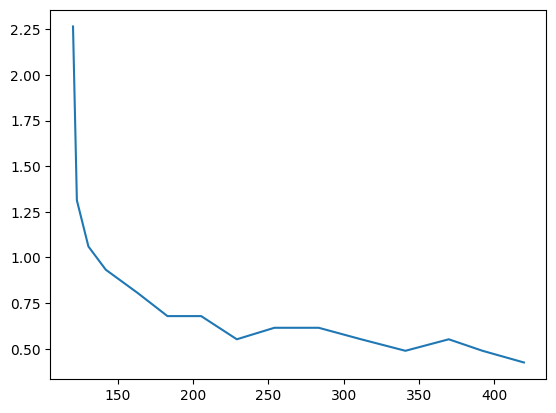

Initial guess:  [np.float64(2.265), 0.008049]
Fitted parameters:  [2.6840188 0.0056251]


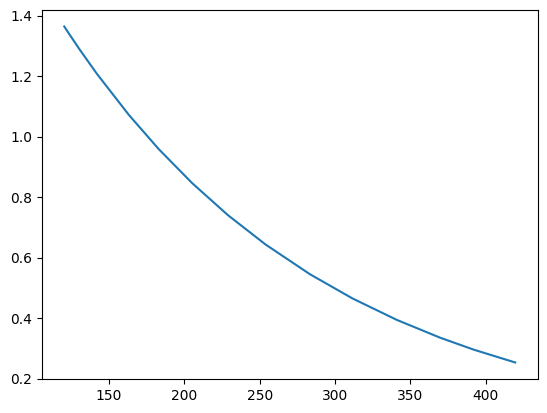

Fitted parameters:  [2.6840188 0.0056251]


In [ ]:
# Testing second half of the data with dissocation equation

testFile105 = importCleanData("VEGFA165_NRP1_0.5-8nM_Lu2023.xlsx", "sheet1", ["Time 0.5nM", "RU 0.5nM"])
# remove the first 4 rows
testFile105 = testFile105.iloc[14:]
testFile105 = testFile105.iloc[:]
testFile105
# plot the data
plt.plot(testFile105["Time 0.5nM"], testFile105["RU 0.5nM"])
plt.show ()

# Initial guess for the parameters
y_initial = testFile105.iloc[0, 1]
y_final = testFile105["RU 0.5nM"].iloc[-1]  # Extract the single value
#initial_guess = [y_initial, y_final, 6e1, 0.5, 1]
initial_guess = [y_initial, 0.008049]
print("Initial guess: ", initial_guess)

# data
t_data = testFile105["Time 0.5nM"]
response_data = testFile105["RU 0.5nM"]

param_k, pcov_k = curve_fit(typical_dissociation, t_data, response_data, p0=initial_guess)
print("Fitted parameters: ", param_k)

# plot the fitted data 
# created fitted response data
fitted_response= typical_dissociation(testFile105["Time 0.5nM"], *param_k)
plt.plot(testFile105["Time 0.5nM"], fitted_response, label='Fitted Data')
plt.show ()
print("Fitted parameters: ", param_k)

In [ ]:
testFile105

,Time 0.5nM,RU 0.5nM
14,120.320,2.265
15,122.878,1.313
16,130.552,1.060
17,142.064,0.933
18,163.169,0.806
19,182.994,0.679
20,205.378,0.679
21,229.041,0.552
22,253.983,0.615
23,283.401,0.615


[0.         0.50359486 0.92376161 1.2754914  1.57105616 1.82050237
 2.03205514 2.2124489  2.36719802 2.50081835]


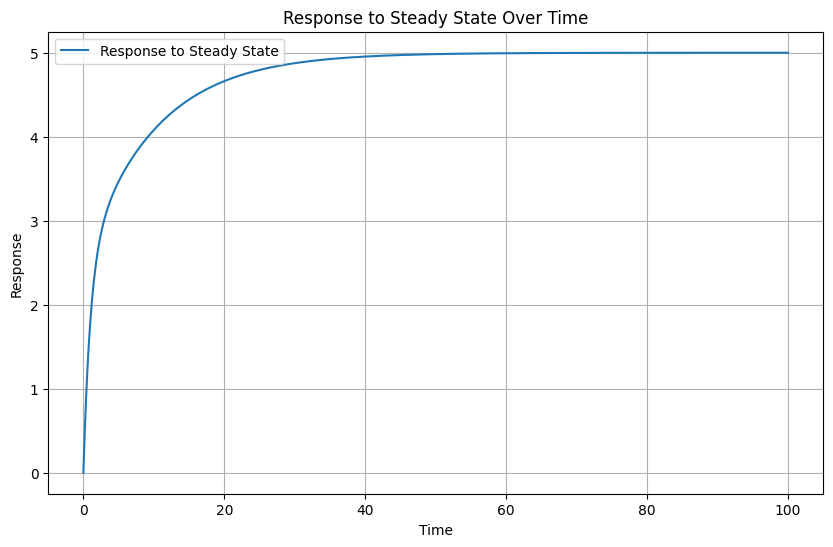

In [ ]:
# Example for response to steady state

# Parameters
y_initial = 0.0
y_final = 5.0
D = 0.5
kon = 1.0
koff = 0.1
t = np.linspace(0, 100, 500)

# Calculate response
response = y_final * ((1 - D * np.exp(-kon * t)) + (D - 1) * np.exp(-koff * t)) + y_initial

# Print some response values for debugging
print(response[:10])
# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, response, label='Response to Steady State')
plt.title('Response to Steady State Over Time')
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.show()

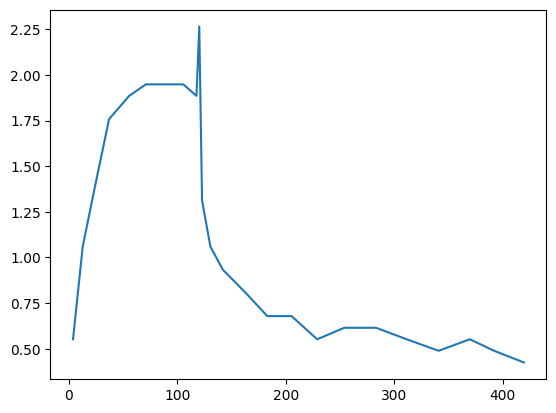

Initial guess:  [np.float64(0.552), np.float64(0.425), 0.9, 0.13, 0.06]
Fitted parameters:  [ 0.92557649  0.199904   61.36406235  0.372592    0.42589446]


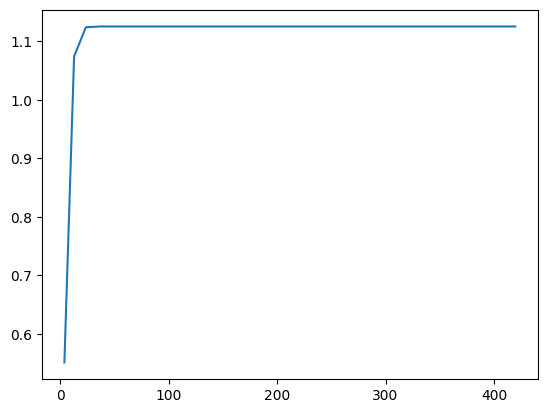

In [ ]:
# test 0
testFile105 = importCleanData("VEGFA165_NRP1_0.5-8nM_Lu2023.xlsx", "sheet1", ["Time 0.5nM", "RU 0.5nM"])
# remove the first 4 rows
testFile105 = testFile105.iloc[5:]
testFile105
# plot the data
plt.plot(testFile105["Time 0.5nM"], testFile105["RU 0.5nM"])
plt.show ()

# Initial guess for the parameters
y_initial = testFile105.iloc[0, 1]
y_final = testFile105["RU 0.5nM"].iloc[-1]  # Extract the single value
#initial_guess = [y_initial, y_final, 6e1, 0.5, 1]
#initial_guess = [y_initial, y_final, 0.005 , 5.547311e+07, 0.008049]
initial_guess = [y_initial, y_final, 0.9, 0.13, 0.06]
#initial_guess = [y_initial, y_final, 0.5 , 0.15, 0.06]
print("Initial guess: ", initial_guess)

# data
t_data = testFile105["Time 0.5nM"]
response_data = testFile105["RU 0.5nM"]

param_k, pcov_k = curve_fit(response_to_steady_state, t_data, response_data, p0=initial_guess)
print("Fitted parameters: ", param_k)

# plot the fitted data 
# created fitted response data
fitted_response= response_to_steady_state(testFile105["Time 0.5nM"], *param_k)
plt.plot(testFile105["Time 0.5nM"], fitted_response, label='Fitted Data')
plt.show ()

In [ ]:
testFile105

,Time 0.5nM,RU 0.5nM
5,3.924,0.552
6,12.878,1.060
7,23.750,1.377
8,37.180,1.758
9,55.727,1.885
10,71.076,1.948
11,90.901,1.948
12,105.610,1.948
13,117.762,1.885
14,120.320,2.265


In [ ]:
vegfa165_nrp1l05 = importCleanData("VEGFA165_NRP1_0.5-8nM_Lu2023.xlsx", "sheet1", ["Time 0.5nM", "RU 0.5nM"])
vegfa165_nrp1l1 = importCleanData("VEGFA165_NRP1_0.5-8nM_Lu2023.xlsx", "sheet1", ["Time 1nM", "RU 1nM"])
vegfa165_nrp1l2 = importCleanData("VEGFA165_NRP1_0.5-8nM_Lu2023.xlsx", "sheet1", ["Time 2nM", "RU 2nM"])
vegfa165_nrp1l4 = importCleanData("VEGFA165_NRP1_0.5-8nM_Lu2023.xlsx", "sheet1", ["Time 4nM", "RU 4nM"])
vegfa165_nrp1l8 = importCleanData("VEGFA165_NRP1_0.5-8nM_Lu2023.xlsx", "sheet1", ["Time 8nM", "RU 8nM"])

vegfa165_nrp1h23 = importCleanData("VEGFA165_NRP1_02.3-39nm_Herve2008.xlsx", "sheet1", ["Time 2.3nM","RU 2.3nM"])
vegfa165_nrp1h46 = importCleanData("VEGFA165_NRP1_02.3-39nm_Herve2008.xlsx", "sheet1", ["Time 4.6nM","RU 4.6nM"])
vegfa165_nrp1h92 = importCleanData("VEGFA165_NRP1_02.3-39nm_Herve2008.xlsx", "sheet1", ["Time 9.2nM","RU 9.2nM"])
vegfa165_nrp1h19 = importCleanData("VEGFA165_NRP1_02.3-39nm_Herve2008.xlsx", "sheet1", ["Time 19.5nM","RU 19.5nM"])
vegfa165_nrp1h39 = importCleanData("VEGFA165_NRP1_02.3-39nm_Herve2008.xlsx", "sheet1", ["Time 39nM","RU 39nM"])

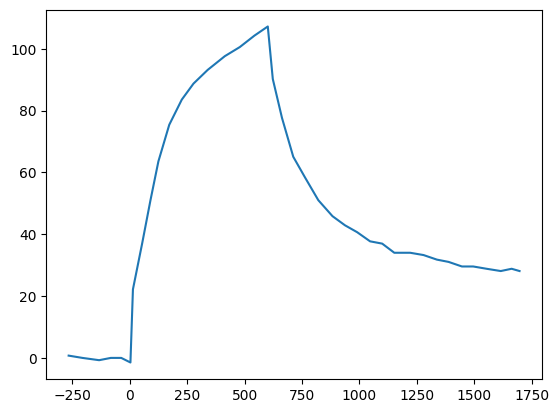

c:\Users\dhlpablo_m2\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dhlpablo_m2\AppData\Local\Temp\ipykernel_10280\2962170710.py:21: OptimizeWarning: Covariance of the parameters could not be estimated
  param_k, pcov_k = curve_fit(response_to_zero, t_data, response_data, p0=initial_guess)


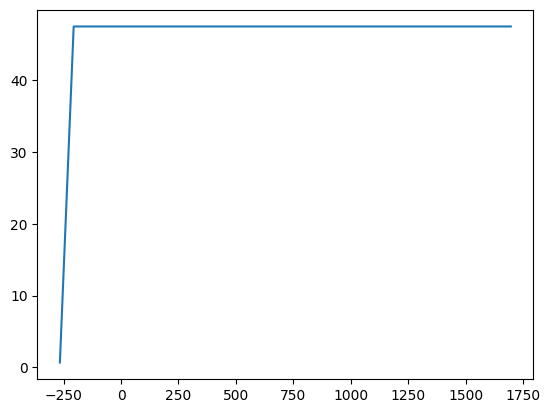

Fitted parameters:  [ 2.40954883e-32  4.74991054e+01 -1.32290794e-02  2.83196737e-01]


In [ ]:
# Testing other equations
#testFile1
testFile105 = importCleanData("VEGFA165_NRP1_02.3-39nm_Herve2008.xlsx", "sheet1", ["Time 4.6nM","RU 4.6nM"])
# remove the first 4 rows
testFile105 = testFile105.iloc[4:]
testFile105
# plot the data
plt.plot(testFile105["Time 4.6nM"], testFile105["RU 4.6nM"])
plt.show ()
# fit the data
y_initial = testFile11.iloc[0, 1]
y_final = testFile105["RU 4.6nM"].iloc[-1]  # Extract the single value
#initial_guess = [y_initial, y_final, 6e1, 0.5, 1]
initial_guess = [1, y_initial, 0.01, 0.3]
#print("Initial guess: ", initial_guess)

# data
t_data = testFile105["Time 4.6nM"]
response_data = testFile105["RU 4.6nM"]

param_k, pcov_k = curve_fit(response_to_zero, t_data, response_data, p0=initial_guess)

# plot the fitted data 
# created fitted response data
fitted_response= response_to_zero(testFile105["Time 4.6nM"], *param_k)
plt.plot(testFile105["Time 4.6nM"], fitted_response, label='Fitted Data')
plt.show ()
print("Fitted parameters: ", param_k)

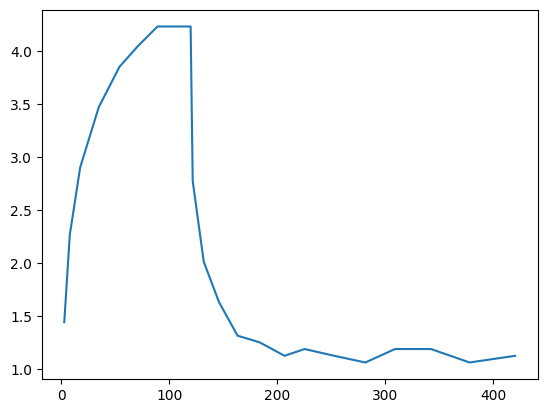

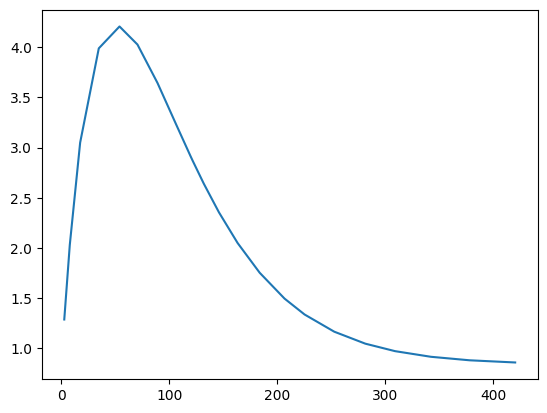

Fitted parameters:  [0.17874384 0.83771706 0.01949568 0.01949567]


In [ ]:
# Testing second data set

testFile11 = importCleanData("VEGFA165_NRP1_0.5-8nM_Lu2023.xlsx", "sheet1", ["Time 1nM", "RU 1nM"])
testFile11 = testFile11.iloc[7:]

testFile11

# plot the data
plt.plot(testFile11["Time 1nM"], testFile11["RU 1nM"])
plt.show ()

# Initial guess for the parameters
y_initial = testFile11.iloc[0, 1]
y_final = testFile11["RU 1nM"].iloc[-1]  # Extract the single value
#initial_guess = [y_initial, y_final, 6e1, 0.5, 1]
initial_guess = [1, y_initial, 0.08, 0.09]
#print("Initial guess: ", initial_guess)

# data
t_data = testFile11["Time 1nM"]
response_data = testFile11["RU 1nM"]

param_k, pcov_k = curve_fit(response_to_zero, t_data, response_data, p0=initial_guess)

# plot the fitted data 
# created fitted response data
fitted_response= response_to_zero(testFile11["Time 1nM"], *param_k)
plt.plot(testFile11["Time 1nM"], fitted_response, label='Fitted Data')
plt.show ()
print("Fitted parameters: ", param_k)


In [ ]:
testFile11

,Time 1nM,RU 1nM
7,2.645,1.440
8,7.762,2.265
9,17.355,2.900
10,34.622,3.471
11,53.808,3.852
12,70.436,4.042
13,88.983,4.232
14,106.890,4.232
15,119.680,4.232
16,121.599,2.773


# Plotting the fit to a pot of the data

In [ ]:
#Data Reporting

def plot_data(fitted_response, time_pt, response_data, function, fitted_param, label):
    """
    This function plots the data and the fitted data on the same graph against time

    Parameters
    ----------
    fitted_response : pandas dataframe
        The dataframe containing the time and response values
    time_pt : string
        The column name of the time values
    response_data : string
        The column name of the response values
    function : function
        The function that was used to fit the data
    fitted_param : list
        The parameters of the function
    label : string
        The label of the data

    Returns
    -------
    None
    """
    plt.scatter(fitted_response[time_pt], fitted_response[response_data], label=f'{label} Data')
    plt.plot(fitted_response[time_pt], function(fitted_response,response_data)(fitted_response[time_pt], *fitted_param), 'r-', label=f'{label} Fit')

    plt.figure()
    plt.title()
    plt.show()

def data_stats():
    np.mean()
    np.ptp()
    np.std()